## Importing modules

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

2024-11-14 19:33:29.663235: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading Data and Preprocessing

In [3]:
# Loading the data
from sklearn.datasets import load_digits
from tensorflow.keras.utils import to_categorical
digits = load_digits()
images = digits.images
targets = digits.target
targets_categorical = to_categorical(targets, num_classes=10)

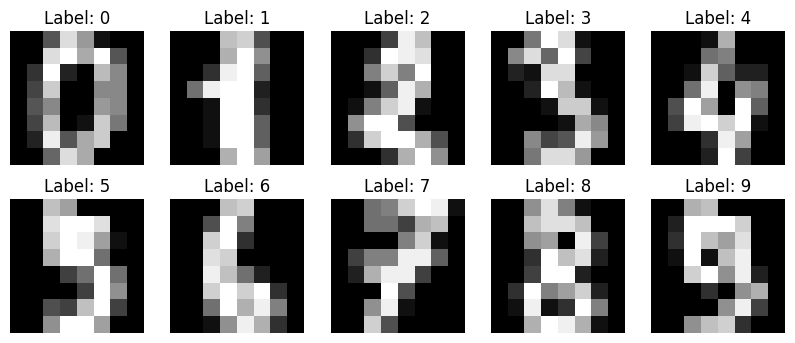

In [4]:
# Visualising our data
plt.figure(figsize=(10, 4))

# Display the first 10 images along with their target labels
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {targets[i]}")
    plt.axis('off')


In [5]:
# Preprocessing

# Normalizing the images
images = images / 16.0

# Adding dimension to images
images = np.expand_dims(images, axis=-1)  


In [6]:
from sklearn.model_selection import train_test_split
# Splitting our data
X_train, X_test, y_train, y_test = train_test_split(images, targets_categorical, test_size=0.2, random_state=42)


## Creating a CNN model

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 6, 6, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 1, 1, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,466 (76.04 KB)

 Trainable params: 19,466 (76.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [10]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.2129 - loss: 2.2106 - val_accuracy: 0.6833 - val_loss: 1.8149
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7692 - loss: 1.5981 - val_accuracy: 0.7917 - val_loss: 0.9822
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8563 - loss: 0.8315 - val_accuracy: 0.8917 - val_loss: 0.5129
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8952 - loss: 0.4900 - val_accuracy: 0.9222 - val_loss: 0.3743
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9253 - loss: 0.3527 - val_accuracy: 0.9278 - val_loss: 0.2986
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9272 - loss: 0.2860 - val_accuracy: 0.9417 - val_loss: 0.2259
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9548 - loss: 0.2121 - val_accuracy: 0.9500 - val_loss: 0.1957
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9484 - loss: 0.1942 - val_accuracy: 0.9417 - val_lo

## Testing the model

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9597 - loss: 0.1477 
Test Loss: 0.1504703015089035
Test Accuracy: 0.9527778029441833
